In [22]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson

import pylab
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn import preprocessing
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, svm


In [23]:
print("Start : %s\n" % time.ctime())

X = pd.read_csv("./MLinTheUnknown-Data/X_train.csv", header=None)
y = pd.read_csv("./MLinTheUnknown-Data/y_train.csv", header=None)

X_val = pd.read_csv("./MLinTheUnknown-Data/X_val.csv", header=None)
y_val = pd.read_csv("./MLinTheUnknown-Data/y_val.csv", header=None)

X_test = pd.read_csv("./MLinTheUnknown-Data/X_test.csv", header=None)

print("Stop : %s\n" % time.ctime())

Start : Wed Apr 28 06:40:23 2021

Stop : Wed Apr 28 06:40:23 2021



In [24]:
def KNN_pca(X, y, X_val, y_val, X_test, pca_i):
       
    pca = PCA(n_components= pca_i, random_state= 42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    #KNN -classifier
    clf_knn = KNeighborsClassifier(
            n_neighbors = 1, 
            weights = 'uniform', 
            leaf_size =5,
            algorithm = 'auto',
            p=1)
    
    clf_knn.fit(X_train, y_train)
    y_pred_knn= clf_knn.predict(X_val)
    f1_knn= f1_score(y_val, y_pred_knn, average='weighted')
    f1_knn =  round(f1_knn,5)
    return f1_knn


def RF_pca(X, y, X_val, y_val, X_test, pca_i):
    pca = PCA(n_components=pca_i, random_state= 42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)
    
    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    clf_rf = RandomForestClassifier(n_estimators = 160, 
                                    criterion='gini', 
                                    min_samples_leaf= 1, 
                                    max_features = 'auto',
                                    min_samples_split =2,
                                    random_state= 0
                                   )
    
    clf_rf.fit(X_train, y_train)

    y_pred_rf = clf_rf.predict(X_val)
    f1_rf= f1_score(y_val, y_pred_rf, average='weighted')
    f1_rf= round(f1_rf,5)
    return f1_rf


def extraTree_pca(X, y, X_val, y_val, X_test, pca_i):
    pca = PCA(n_components=pca_i, random_state= 42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)
    
    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
      
    clf_etc = ExtraTreesClassifier( criterion = 'gini',
                                   max_features = 'auto',
                                   random_state=0
                                  )
    clf_etc.fit(X_train, y_train)
    y_pred_etc = clf_etc.predict(X_val)

    f1_etc= f1_score(y_val, y_pred_etc, average='weighted')
    f1_etc =round(f1_etc,5)
    return f1_etc


def xgboost_pca(X, y, X_val, y_val, X_test, pca_i):
    pca = PCA(n_components = pca_i, random_state=42)
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    y_train =np.array(y).ravel()
    y_val =np.array(y_val).ravel()
    # 归一化
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    Validation = True
    if Validation == True:
        model = xgb.XGBClassifier(
                max_depth=7,
                learning_rate=0.05,
                n_estimators=1000,
 
                silent=True,
                objective='multi:softmax',
        )

        model.fit(X_train,y_train)
        y_pred_xgb = model.predict(X_val)
        f1_xgb = f1_score(y_val, y_pred_xgb, average='weighted')
        f1_xgb = round(f1_xgb, 5)
        
    return f1_xgb


def Light_gbm_pca(X, y, X_val, y_val, X_test, pca_i):
    
    pca = PCA(n_components=pca_i, random_state=42)
    # random_state=42
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    gbm = LGBMClassifier(
       num_leaves=31,
        max_depth = -1, 
        learning_rate=0.1,
        n_estimators= 120, 
        silent = True,
        objective = 'multiclass' )
    
    gbm.fit(X_train,y_train)
    y_pred_gbm = gbm.predict(X_val, num_iteration=46)
    f1_gbm = f1_score(y_val, y_pred_gbm, average='weighted')
    f1_gbm =round(f1_gbm,5)
    
    return f1_gbm


def GradientBoosting_pca(X, y, X_val, y_val, X_test, pca_i):
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(X)
    Xval = scaler.transform(X_val)
    

    pca = PCA(n_components = pca_i, random_state=0)
    Xtrain = pca.fit_transform(Xtrain)
    Xval = pca.transform(Xval)

    
    y = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    clf = GradientBoostingClassifier(n_estimators=150)
    clf.fit(Xtrain, y)
    pred_y_val = clf.predict(Xval)
  

    f1_gb = f1_score(y_val, pred_y_val, average='weighted')
    f1_gb = round(f1_gb, 5)
   
    return f1_gb



def Bagging_pca(X, y, X_val, y_val, X_test, pca_i):
    pca = PCA(n_components = pca_i, random_state=42)
    
    X_train = pca.fit_transform (X)
    X_val = pca.transform (X_val)

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    bagging_model = BaggingClassifier(
        base_estimator= ExtraTreeClassifier(criterion = 'entropy',max_features = 'auto',random_state=0),
        n_estimators = 170,
        max_samples = 6400,
        random_state = 20
    )  
    bagging_model.fit(X_train, y_train )
    y_pred_bag = bagging_model.predict(X_val)
    
    f1_bag= f1_score(y_val, y_pred_bag, average='weighted')
    f1_bag = round(f1_bag,5)
    
    return f1_bag



def ada_classifier_pca(X, y, X_val, y_val, X_test, pca_i): # Adaboost
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    y_train = np.array(y).ravel()
    X_val = scaler.transform(X_val)
    y_val = np.array(y_val).ravel()

    pca = PCA(n_components = pca_i, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)

    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12), n_estimators=150)
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    
    f1_ada = f1_score(y_val, y_pred_val, average='weighted')
    f1_ada = round(f1_ada,5)
    
    return f1_ada
  

def scv_classifier_pca(X, y, X_val, y_val, X_test, pca_i):   # SVM method
    # normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    y_train = np.array(y).ravel()
    X_val = scaler.transform(X_val)
    y_val = np.array(y_val).ravel()
    
    # decomposition
    pca = PCA(n_components = pca_i, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    
    # train
    svc = svm.SVC(C=2.0)
    svc.fit(X_train, y_train)

    y_pred_val = svc.predict(X_val)
    f1_svm = f1_score(y_val, y_pred_val, average='weighted')
    f1_svm = round(f1_svm,5)
    return f1_svm


def lr_classfier_pca(X, y, X_val, y_val, X_test, pca_i): 
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_val = scaler.transform(X_val)
   
    pca = PCA(n_components= pca_i, random_state=0)
    X = pca.fit_transform(X)
    X_val = pca.transform(X_val)
    
    
    y = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    clf = LogisticRegression(C=10.1,solver = 'newton-cg')

    clf.fit(X, y)

    pred_val_y = clf.predict(X_val)
    
    f1_lr = f1_score(y_val, pred_val_y, average='weighted')
    f1_lr =  round(f1_lr,5)
    
    return f1_lr



In [4]:
# for pca

pca_knn = []
pca_randomForest =[]

pca_extratree =[]
pca_xgboost=[]

pca_light_gbm =[]

pca_gradientBoosting = []

pca_bagging= []

pca_adaboost = []

pca_svm = []
pca_logistic_regression = []

# 1
for i in range(1,70):
    f1 = KNN_pca(X, y, X_val, y_val, X_test, i)
    pca_knn.append(f1)

# 2  
for i in range(1,70):
    f2 = RF_pca(X, y, X_val, y_val, X_test, i)
    pca_randomForest.append(f2)
    
# 3
for i in range(1,70):
    f3 =extraTree_pca(X, y, X_val, y_val, X_test, i)
    pca_extratree.append(f3)

# 4  
for i in range(1,70):
    f4 = xgboost_pca(X, y, X_val, y_val, X_test, i)
    pca_xgboost.append(f4)
    
# 5
for i in range(1,70):
    f5 = Light_gbm_pca(X, y, X_val, y_val, X_test, i)
    pca_light_gbm.append(f5)

# 6
for i in range(1,70):
    f6 = GradientBoosting_pca(X, y, X_val, y_val, X_test, i)
    pca_gradientBoosting.append(f6)

# 7   
for i in range(1,70):
    f7 =Bagging_pca(X, y, X_val, y_val, X_test, i)
    pca_bagging.append(f7)
# 8
for i in range(1,70):
    f8 = ada_classifier_pca(X, y, X_val, y_val, X_test, i)
    pca_adaboost.append(f8)
# 9
for i in range(1,70):
    f9 = scv_classifier_pca(X, y, X_val, y_val, X_test, i)
    pca_svm.append(f9)
    
# 10
for i in range(1,70):
    f10 = lr_classfier_pca(X, y, X_val, y_val, X_test, i)
    pca_logistic_regression.append(f10)


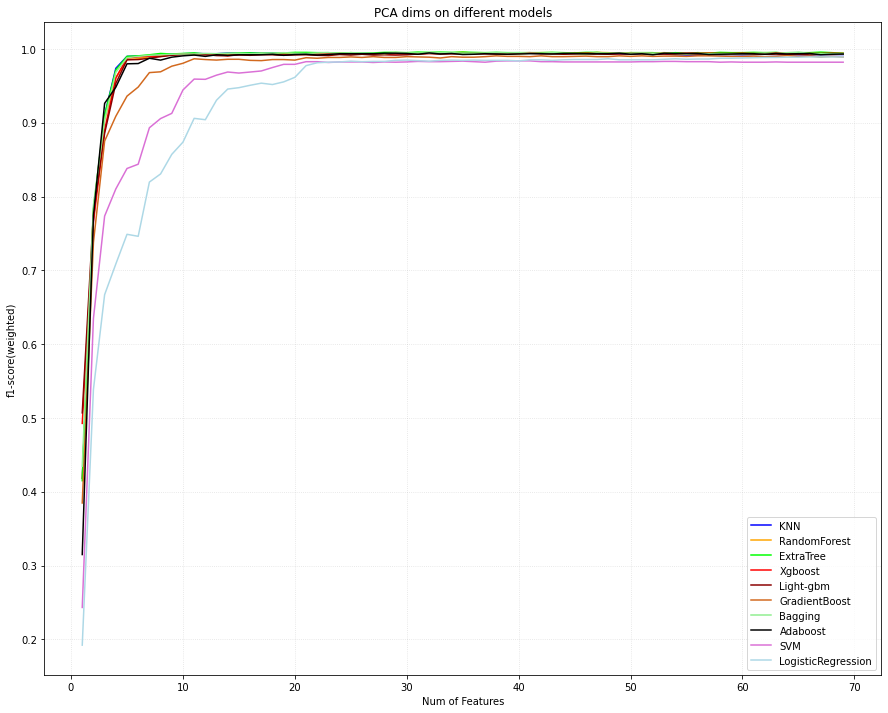

In [21]:
# draw the comparison picture of PCA in difference model


x = [i for i in range(1,70)]
plt.figure(figsize=(15,12))
plt.title("PCA dims on different models")
# 1
plt.plot(x, pca_knn, color='blue', label="KNN")
# 2
plt.plot(x, pca_randomForest, color='Orange', label="RandomForest")
# 3
plt.plot(x, pca_extratree, color='Lime', label="ExtraTree")
# 4
plt.plot(x, pca_xgboost, color='Red', label="Xgboost")
# 5
plt.plot(x, pca_light_gbm, color='DarkRed', label="Light-gbm")
# 6
plt.plot(x, pca_gradientBoosting, color='Chocolate', label="GradientBoost")
# 7
plt.plot(x, pca_bagging, color='lightgreen', label="Bagging")
# 8
plt.plot(x, pca_adaboost, color='black', label="Adaboost")
# 9
plt.plot(x, pca_svm, color='Orchid', label="SVM")
# 10
plt.plot(x, pca_logistic_regression, color='lightblue', label="LogisticRegression")
# ##############
plt.legend()
plt.grid(alpha=0.4,linestyle=':')

plt.xlabel("Num of Features")
# plt.ylim(0.85,1)
# plt.xticks(x, random_sizes, rotation=0)
plt.ylabel("f1-score(weighted)")
plt.savefig('pca_2.png')
plt.show()
